# Online Shoppers Purchasing Intention Dataset


    TE Hélène
    
    BOURDILLON Ulysse
    
    MEVANZA Emmanuelle
    

### Dataset Information
Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

Additional Information

The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 

## IMPORTS

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp


## DATA LOADING

In [29]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head(20)

Administrative  Administrative_Duration  Informational  \
0                0                      0.0              0   
1                0                      0.0              0   
2                0                      0.0              0   
3                0                      0.0              0   
4                0                      0.0              0   
5                0                      0.0              0   
6                0                      0.0              0   
7                1                      0.0              0   
8                0                      0.0              0   
9                0                      0.0              0   
10               0                      0.0              0   
11               0                      0.0              0   
12               0                      0.0              0   
13               0                      0.0              0   
14               0                      0.0              0   
15               2                     53.0              0   
16               0                      0.0              0   
17               0                      0.0              0   
18               0                      0.0              0   
19               0                      0.0              0   

    Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                      0.0               1                 0.000000   
1                      0.0               2                64.000000   
2                      0.0               1                 0.000000   
3                      0.0               2                 2.666667   
4                      0.0              10               627.500000   
5                      0.0              19               154.216667   
6                      0.0               1                 0.000000   
7                      0.0               0                 0.000000   
8                      0.0               2                37.000000   
9                      0.0               3               738.000000   
10                     0.0               3               395.000000   
11                     0.0              16               407.750000   
12                     0.0               7               280.500000   
13                     0.0               6                98.000000   
14                     0.0               2                68.000000   
15                     0.0              23              1668.285119   
16                     0.0               1                 0.000000   
17                     0.0              13               334.966667   
18                     0.0               2                32.000000   
19                     0.0              20              2981.166667   

    BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0      0.200000   0.200000         0.0         0.0   Feb                 1   
1      0.000000   0.100000         0.0         0.0   Feb                 2   
2      0.200000   0.200000         0.0         0.0   Feb                 4   
3      0.050000   0.140000         0.0         0.0   Feb                 3   
4      0.020000   0.050000         0.0         0.0   Feb                 3   
5      0.015789   0.024561         0.0         0.0   Feb                 2   
6      0.200000   0.200000         0.0         0.4   Feb                 2   
7      0.200000   0.200000         0.0         0.0   Feb                 1   
8      0.000000   0.100000         0.0         0.8   Feb                 2   
9      0.000000   0.022222         0.0         0.4   Feb                 2   
10     0.000000   0.066667         0.0         0.0   Feb                 1   
11     0.018750   0.025833         0.0         0.4   Feb                 1   
12     0.000000   0.028571         0.0         0.0   Feb                 1   
13     0.000000   0.066667         0.0         0.0   Feb                 2   
14     0.000000   0.100000         0.0 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## VARIABLES EXPLANATION :

As we now have a little view on our data, here is a presentation of each columns so we can already understand what we are talking about. 


- `Administrative`, `Informational`, `ProductRelated` : number of different types of pages visited by the visitor in that session.

        - Administrative pages could include pages like account management, contact pages, or help sections.
        - Informational pages could include terms of service, privacy policy, or product information pages.
        - Product-related pages usually involve browsing specific products or categories.
        

- `Administrative_Duration`, `Informational_Duration`, `ProductRelated_Duration` : total time spent in each of these page categories.


- `BounceRates` : refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. A higher bounce rate might indicate that visitors are not finding what they are looking for.


- `ExitRates` : For all pageviews to the page, Exit Rate is the percentage that were the last in the session.


- `PageValues` : represents the average value for a web page that a user visited before completing an e-commerce transaction. This value is intended to give you an idea of which page in your site contributed more to your site's revenue. (float : i.e. $100.5).


- `SpecialDay` : indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day, promotional event) in which the sessions are more likely to be finalized with transaction.The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.


- `Month` : Represents the month of the year during which the online interaction occurred.


- `OperatingSystems` : OS of the visitor (int value).


- `Browser` : Browser of the visitor (int value).


- `Region` : the region of the started session.


- `TrafficType` : Source before the website ex: Link, Ad...


- `VisitorType` : 'New Visitor', 'Returning Visitor' and 'Other'.


- `Weekend` : boolean value indicates whether the date of the visit is weekend.


- `Revenue` : boolean value indicates whether the visit has been finalized by a transaction.

*For more information :*

`BounceRates`, `ExitRates` and `PageValues` features represent the metrics measured by "Google Analytics" for each page in the e-commerce site, for more details check : 
- https://support.google.com/analytics/answer/2695658?hl=en 
- https://support.google.com/analytics/answer/2525491?hl=en&sjid=10687907467968608279-NC

# Data visualisation

## 1. Data cleaning

Firstly, we decided to convert the categorical variables with numerical type and round off two float variables to 2 decimal places to facilitate visualization.

Next, we replaced 'False' and 'True' with '0' and '1' for the two boolean variables:  `Revenue` and `Weekend`.


In [31]:
month_to_num = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
num_to_month = {v: k for k, v in month_to_num.items()}

In [32]:
df['OperatingSystems'] = df['OperatingSystems'].astype(str)
df['Browser'] = df['Browser'].astype(str)
df['Region'] = df['Region'].astype(str)
df['TrafficType'] = df['TrafficType'].astype(str)
df['SpecialDay'] = df['SpecialDay'].astype(str)



In [33]:
df['Revenue'] = df['Revenue'].replace({True: 1, False: 0})
df['Weekend'] = df['Weekend'].replace({True: 1, False: 0})

In [34]:
df = df.round({'ProductRelated_Duration': 2, 'ProductRelated_Duration': 2, 
               'ExitRates': 2,'PageValues':2,'BounceRates':2})

*We change again the types because these don't match with their meanings*

In [35]:
df['Revenue'] = df['Revenue'].astype(str)
df['Weekend'] = df['Weekend'].astype(str)


For the first variables, corresponding to administrative/informational related variables i think there is no need to visualize them alone because these are only number of pages visitated each time.

## 2. Our graphes

### Variables statistics :

In [36]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746230   
std                140.749294       44.475503              1913.669282   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.935000   
75%                  0.000000       38.000000              1464.157500   
max               2549.375000      705.000000             63973.520000   

        BounceRates     ExitRates    PageValues  
count  12330.000000  12330.000000  12330.000000  
mean       0.022103      0.042975      5.889238  
std        0.048593      0.048764     18.568405  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.010000      0.000000  
50%        0.000000      0.030000      0.000000  
75%        0.020000      0.050000      0.000000  
max        0.200000      0.200000    361.760000

In [37]:
for column in df.select_dtypes(include='object').columns:
    print(f"Frequency for {column}:")
    print(df[column].value_counts())
    print()

Frequency for SpecialDay:
SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64

Frequency for Month:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

Frequency for OperatingSystems:
OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

Frequency for Browser:
Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

Frequency for Region:
Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

Frequency for TrafficType:
TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42


With this, we have the distribution of each categorical variable, which helps us understand the proportion of each category for different variable

In [38]:
df.describe(include="object")

SpecialDay  Month OperatingSystems Browser Region TrafficType  \
count       12330  12330            12330   12330  12330       12330   
unique          6     10                8      13      9          20   
top           0.0    May                2       2      1           2   
freq        11079   3364             6601    7961   4780        3913   

              VisitorType Weekend Revenue  
count               12330   12330   12330  
unique                  3       2       2  
top     Returning_Visitor       0       0  
freq                10551    9462   10422

After we did a statistic description of our object variables, we can see that there is :
    
    - 10 values for months, which means that 2 monts are missing, 
    so surely later in our studies we will identify them and give a reason for that.
    
    - 3 categories of visitors.
    
    - 6 of special days
    
    - 8, 13, 9 and 20 for respectivly "OperatingSystems", "Browser", "Region", and "TrafficType".

## Graphic visualization :

### 1. CATEGORICAL VARIABLES

### Month distribution

In [39]:
month_to_num = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
num_to_month = {v: k for k, v in month_to_num.items()}
# Apply the mapping and sort
month_counts = df['Month'].value_counts()
month_counts.index = pd.Index([month_to_num[month] for month in month_counts.index])
month_counts = month_counts.sort_index()
print(month_counts)
month_counts.index = pd.Index([num_to_month[month] for month in month_counts.index])
month_counts = pd.DataFrame(month_counts)
print(month_counts)

2      184
3     1907
5     3364
6      288
7      432
8      433
9      448
10     549
11    2998
12    1727
Name: count, dtype: int64
      count
Feb     184
Mar    1907
May    3364
June    288
Jul     432
Aug     433
Sep     448
Oct     549
Nov    2998
Dec    1727


In [40]:
month_counts.reset_index(inplace=True)

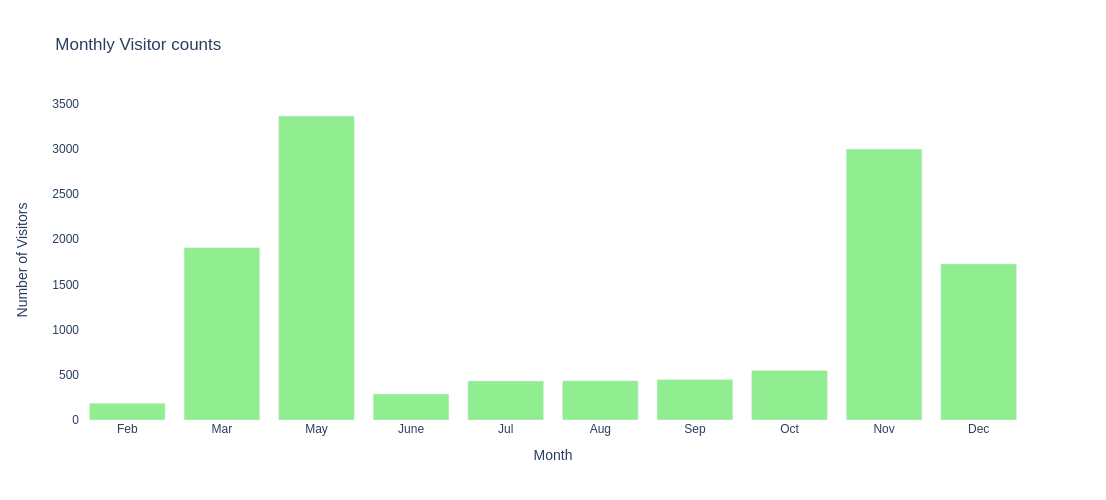

In [41]:
month_counts.columns = ['Month', 'Count']

bar_color = 'lightgreen'
fig = px.bar(month_counts, x='Month', y='Count', title='Monthly Visitor counts')

fig.update_layout(
    width=800,
    height=500,
    yaxis_title='Number of Visitors',
    plot_bgcolor='white', 
)

fig.update_traces(marker_color=bar_color)

fig.show()


The interest in visualizing the monthly distribution of visitors is twofold.

Firstly, it allows us to identify the missing months, namely January and April. While the reason for their absence is currently unknown, further investigation will be conducted with additional information.

Secondly, the top four months with the highest website traffic are `May`, `November`, `March`, and December. 

It can be reasonably assumed that the increased activity in November and December is possibly attributed to Black Friday and Christmas.

### Categories of Visitors

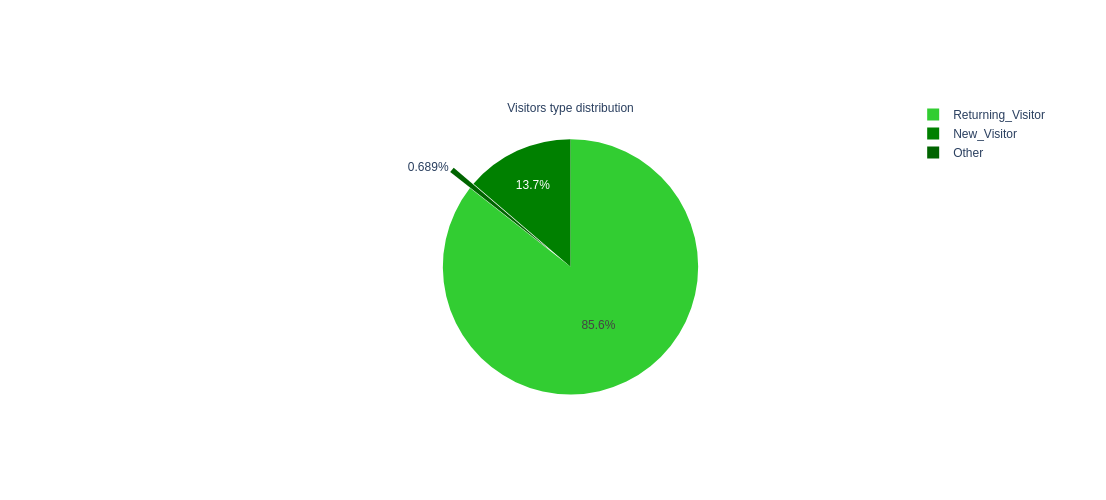

In [42]:
VisitorType_counts = df['VisitorType'].value_counts()

colors = ['limegreen','green', 'darkgreen']
# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=VisitorType_counts.index, values=VisitorType_counts, pull=[0, 0, 0.2, 0],
                             marker=dict(colors=colors),title='Visitors type distribution')])
fig.update_layout(width=500,height=500)
fig.show()

With this initial view of the data, especially the distribution among categories, we clearly observe that the majority of people visiting the website are `Returning visitors`, those who have already visited the site at least once.

Following that, we have `new visitors`, representing only 14%, and then others with less than 1%.

### Weekend visits

In [43]:
Weekend_counts = df['Weekend'].value_counts()

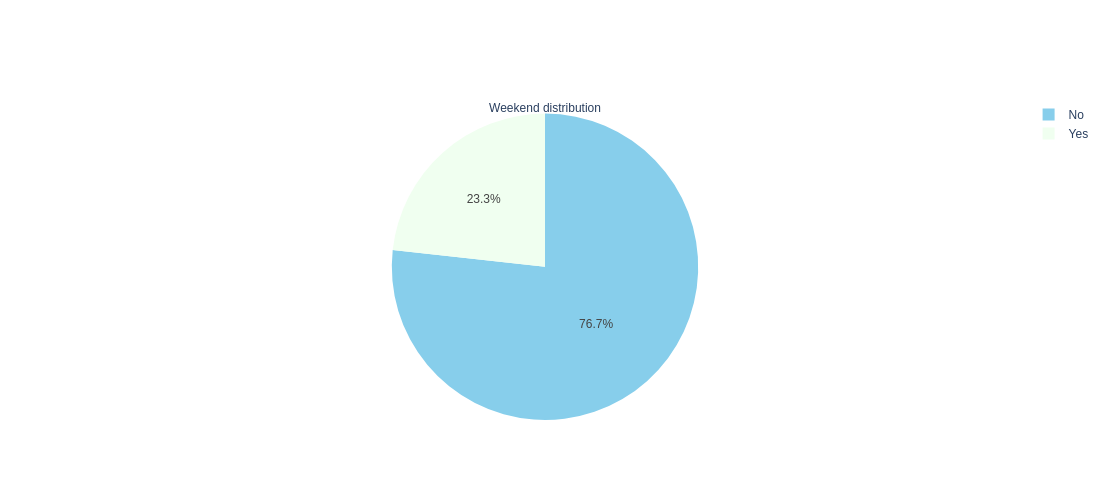

In [44]:
colors = ['skyblue','honeydew']

fig = go.Figure(data=[go.Pie(labels=Weekend_counts.index.map({'1': 'Yes', '0': 'No'}), 
                             values=Weekend_counts, marker=dict(colors=colors),
                             title='Weekend distribution')])
fig.update_layout(width=500,height=500)
# Show the plot
fig.show()

Here, this graph simply shows us that there are more visits to the website during weekdays than on the weekend. However, it's worth noting that the 23% on the weekend is still relatively high, considering there are only two days in the weekend.

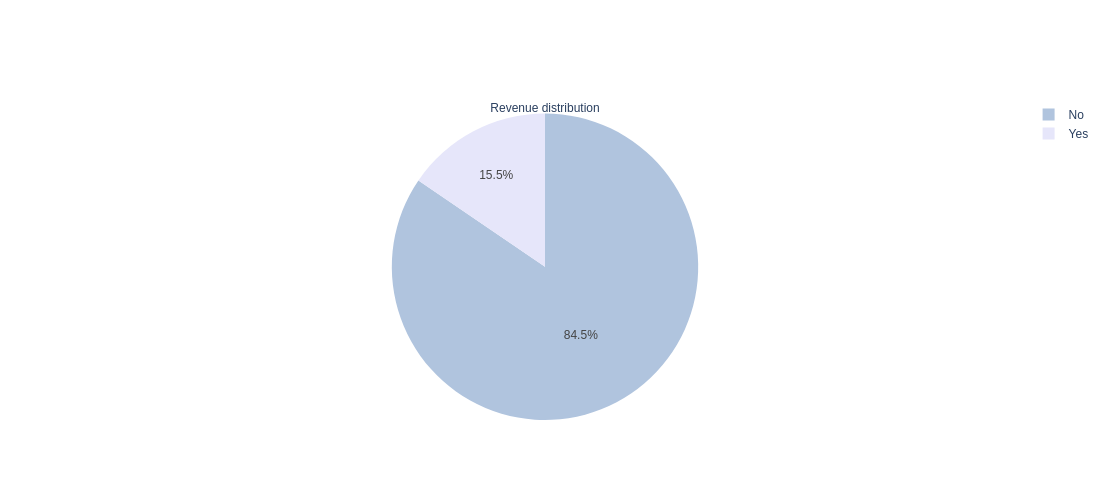

In [45]:
Revenue_counts = df['Revenue'].value_counts()

colors = ['lightsteelblue','lavender']

fig = go.Figure(data=[go.Pie(labels=Revenue_counts.index.map({'1': 'Yes', '0': 'No'}), 
                             values=Revenue_counts, marker=dict(colors=colors),
                             title='Revenue distribution')])
fig.update_layout(width=500,height=500)
# Show the plot
fig.show()

Here, we wanted to examine the proportion of visits that result in a purchase. We observe that the majority of visits are merely visits, with only 15% of them resulting in a purchase.

### Revenue during special days

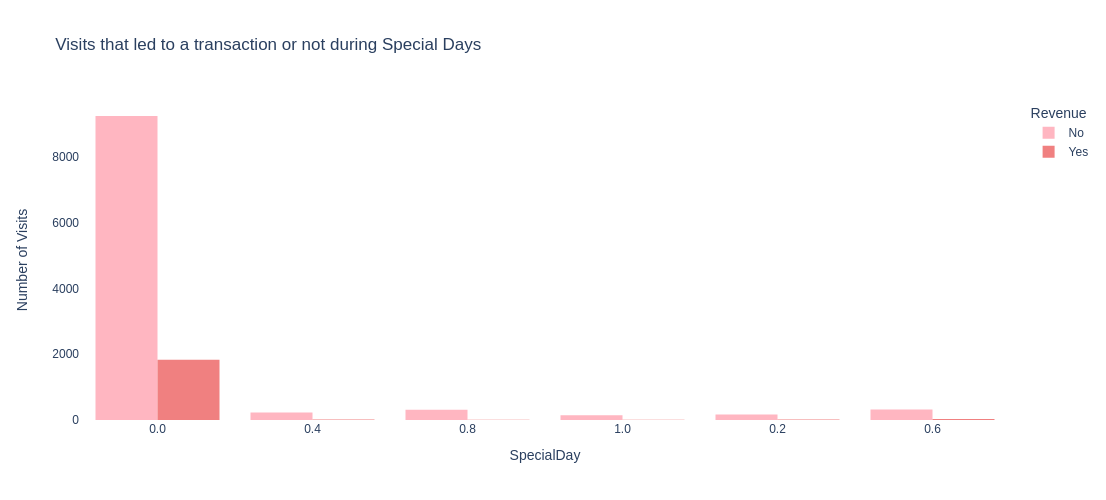

In [46]:
color_map = {'Yes': 'lightcoral', 'No': 'lightpink'}

fig = px.histogram(df, 
                   x="SpecialDay", 
                   color=df['Revenue'].map({'1': 'Yes', '0': 'No'}), 
                   barmode='group',
                   title='Visits that led to a transaction or not during Special Days',
                   color_discrete_map=color_map
                  )
fig.update_layout(
    yaxis_title='Number of Visits',
    width=800,
    height=500,
    legend_title_text='Revenue',
     plot_bgcolor='white'
)
fig.show()


We see that there is no need to be on a special day for having higher revenue on the site.

### Revenue during weekend

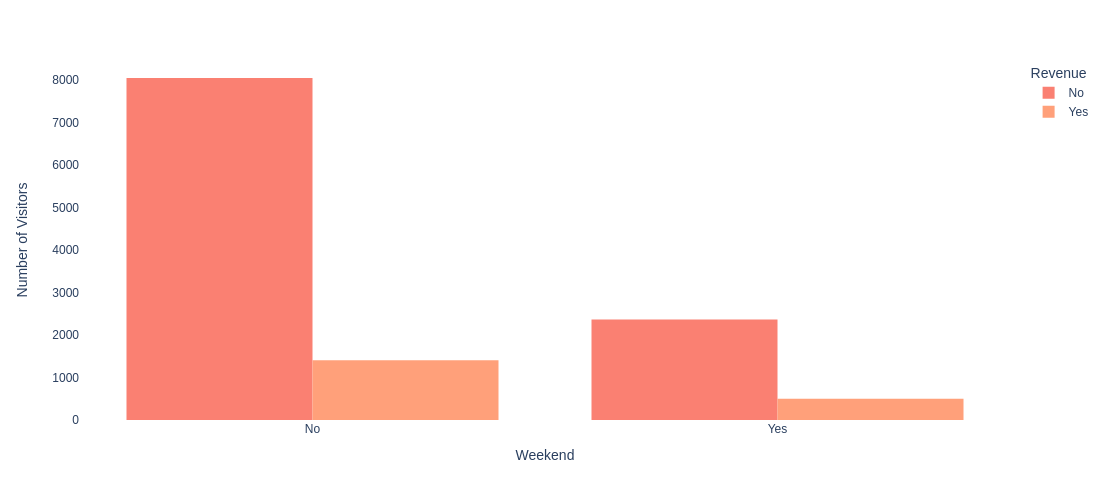

In [47]:
color_map = {'Yes': 'lightsalmon', 'No': 'salmon'}

fig = px.histogram(df, x=df['Weekend'].map({'1': 'Yes', '0': 'No'}), color=df['Revenue'].map({'1': 'Yes', '0': 'No'}), barmode='group',
                   title='',
                  color_discrete_map=color_map)

fig.update_layout(yaxis_title='Number of Visitors',
                  xaxis_title='Weekend',width=800,height=500,
                  legend_title_text='Revenue',
                  plot_bgcolor='white')
fig.show()

There are more visits overall that do not result in a transaction, and there is maybe not necessarily a correlation between the time period (weekday or weekend) and transactions

### Visitors category by month

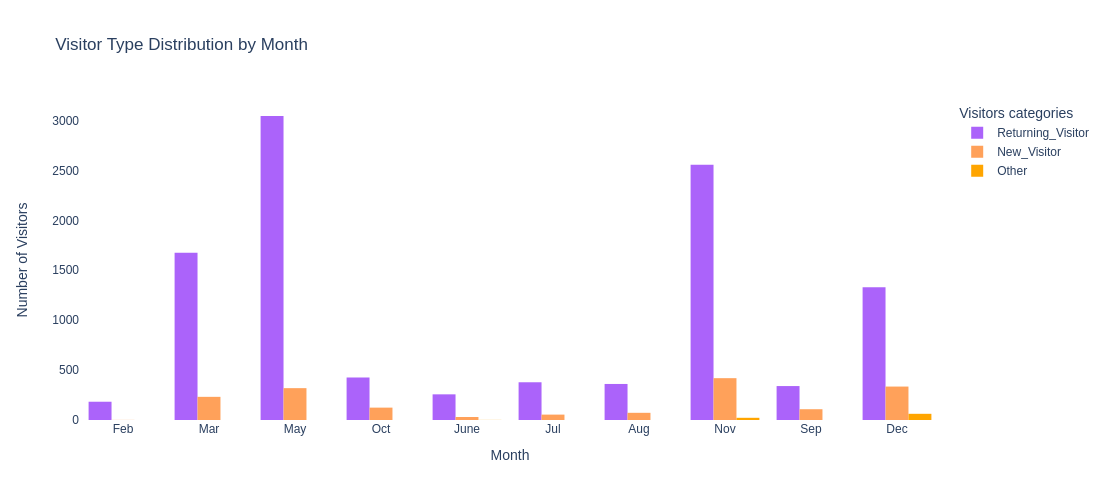

In [48]:
color_map = {'New Visitor': 'red', 'Returning Visitor': 'salmon', 'Other': 'orange'}

fig = px.histogram(df, x="Month", color='VisitorType', barmode='group',
                   title='Visitor Type Distribution by Month',
                  color_discrete_map=color_map)
fig.update_layout(yaxis_title='Number of Visitors',
                  width=800,height=500, 
                  legend_title_text='Visitors categories',
                 plot_bgcolor='white')
fig.show()


As the majority of the quantity pertains to returning visitors, it is evident that every month sees more returning visitors than new ones. However, upon closer examination, we observe that among the top three months (March, November, and December), there are more new visitors in November and December than in May, even though May has the highest number of returning visitors. This observation may be attributed to events such as Black Friday and Christmas.

Finally, the proportion of Other visitors is also concentrated in November and December, which could be related to web scraping, a practice that usually occurs during this period of the year

### Revenue by visitor type

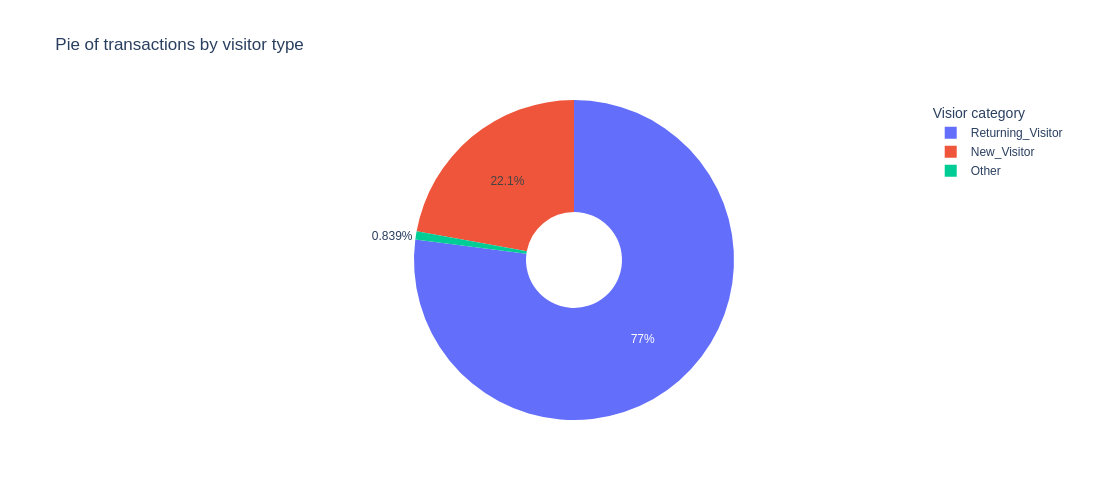

In [49]:
grouped_df = df.groupby(['VisitorType', 'Revenue']).size().unstack()

fig = px.pie(names=grouped_df.index,
             values=grouped_df["1"],
             hole=0.3,
             title="Pie of transactions by visitor type"
             )
fig.update_layout(width=500,height=500, legend_title_text='Visior category',
                 plot_bgcolor='white')
# Show the plot
fig.show()


With this graph, we see that 77% of purchases are made by returning visitors, while 22% are made by new ones. So we think that this is likely influenced by the higher number of returning visitors

### Number of  by visits page type

/tmp/ipykernel_66600/3049143959.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



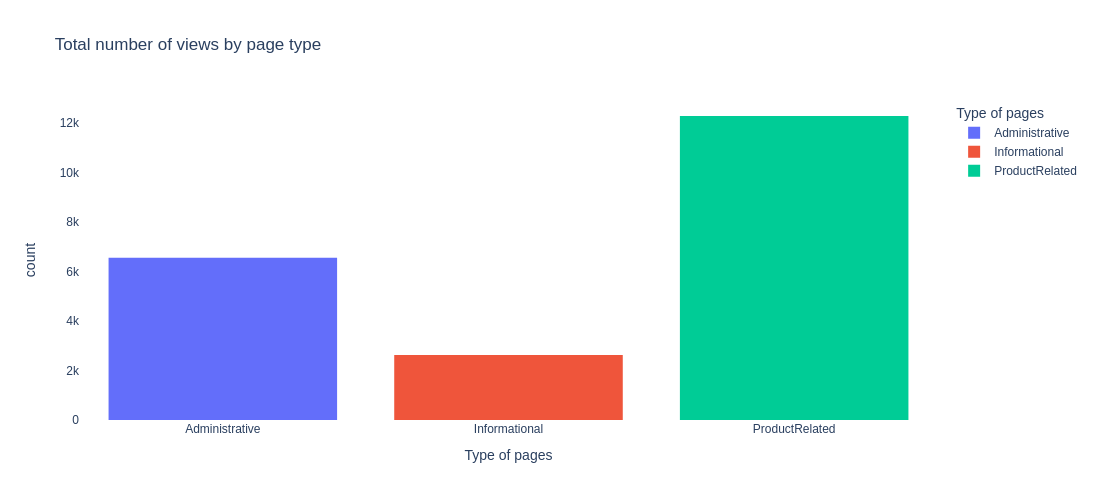

In [50]:
pages_df = df[["Administrative", "Informational", "ProductRelated"]]
pages_df = pages_df.applymap(lambda x: 1 if x >= 1 else 0)


pages_df2 = pd.melt(pages_df, value_vars=pages_df.columns, var_name='Type of pages', value_name='Number of views')
pages_df2 = pages_df2[pages_df2['Number of views'] == 1]

fig = px.histogram(pages_df2, x='Type of pages', color='Type of pages',
                   labels={'Number of views': 'Number of views'},
                   title='Total number of views by page type')

             
fig.update_layout(width=700,height=500,
                 plot_bgcolor='white')
fig.show()



Here, we observe that there are more people visiting product-related pages than administrative or informational pages. It appears that the majority of visitors already have a specific product in mind.

### Visitors type by page type

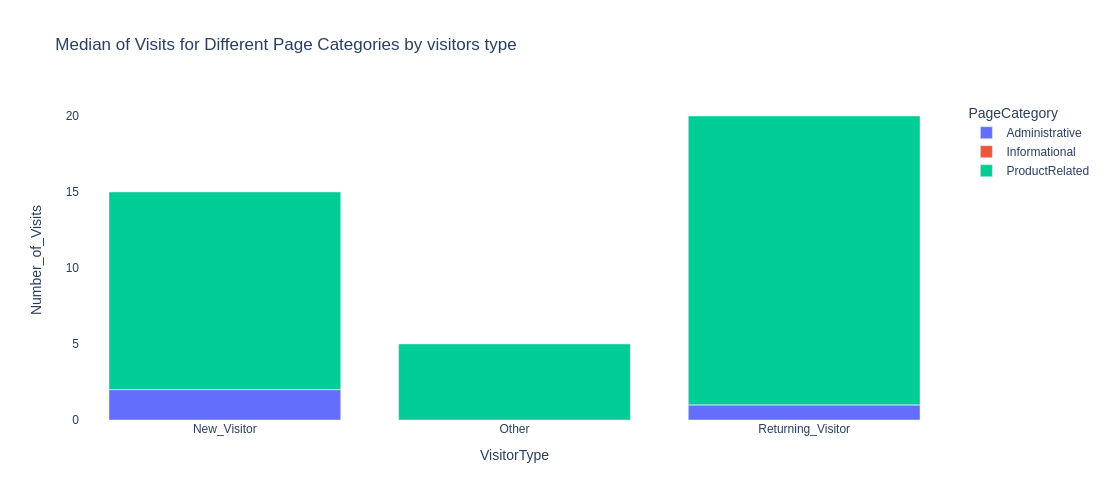

In [51]:

pages_df = df[['VisitorType', 'Administrative', 'Informational', 'ProductRelated']]

grouped_data = pages_df.groupby('VisitorType').median().reset_index()

grouped_data2 = pd.melt(grouped_data, id_vars='VisitorType', var_name='PageCategory', value_name='Number_of_Visits')

fig = px.bar(grouped_data2, x='VisitorType', y='Number_of_Visits', color='PageCategory',
             title='Median of Visits for Different Page Categories by visitors type')
fig.update_layout(width=700,height=500,
                 plot_bgcolor='white')

fig.show()


To complement the previous graph, we decided to create a chart that illustrates, for each category of visitor, the median value of the number of pages in the three-page categories. 

We chose the median as the most representative indicator because we have a value for which 50% of the values are above and the other 50% are below. 

This graph is particularly interesting because it clearly shows that new visitors tend to visit slightly more administrative pages than returning visitors or others. 
A contrario, returning visitors tend to visit more product-related pages than new visitors.

Therefore, we can infer that returning visitors may be more familiar with the articles they seek and have more trust in the website, having visited before. On the other hand, new visitors may be more hesitant and require more assistance on the site.

### Administrative Pages visits by Visitor Type

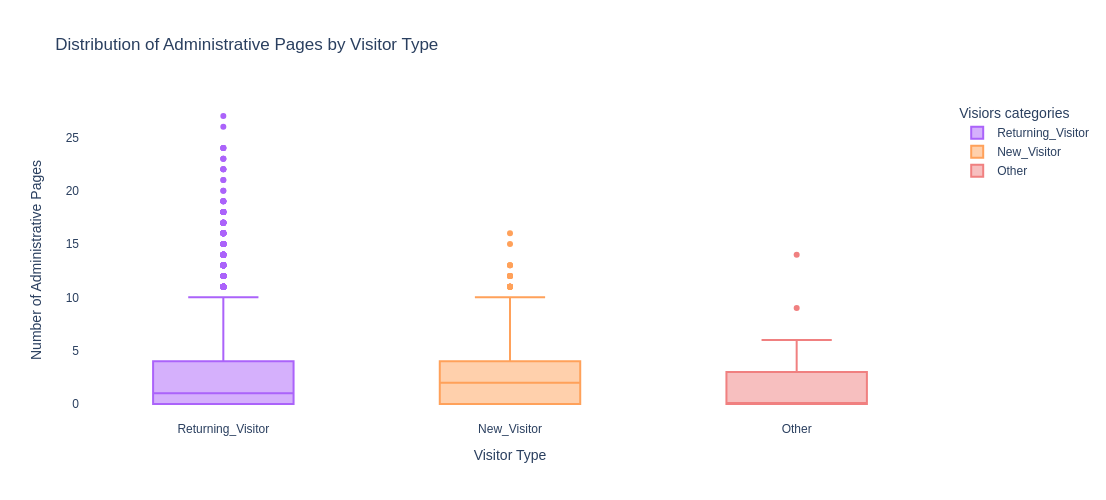

In [52]:
fig = px.box(df, x="VisitorType", y="Administrative",
             labels={"VisitorType": "Visitor Type", "Administrative": "Number of Administrative Pages"},
             title="Distribution of Administrative Pages by Visitor Type",
             color="VisitorType",
             color_discrete_map={"New Visitor": "skyblue", "Returning Visitor": "lightgreen", "Other": "lightcoral"})
fig.update_layout(width=1000,height=500, 
                  legend_title_text='Visiors categories',
                 plot_bgcolor='white')
fig.show()


The purpose of creating these box plots is to visually explore the behavior of visitor types concerning their interaction with administrative pages.

In fact, these pages typically contain information related to account management and contact details. By examining the box plots, we can draw several observations.

First, the highest observed value for the number of administrative pages visited, excluding extreme values for the 2 main boxes (Returning visitors and New visitors) is 11.

So we can say that despite the numerical dominance of "Returning Visitors," "New Visitors" exhibit a comparable or even higher interest in administrative pages. The median values (1 for Returning and 2 ffor New) support the conclusion that "New Visitors" tend to explore these pages more frequently than "Returning Visitors." The visualization provides a clear and concise understanding of the distribution and central tendencies of different type of visitors regarding those pages.

### Product-Related Pages by Visitor Type

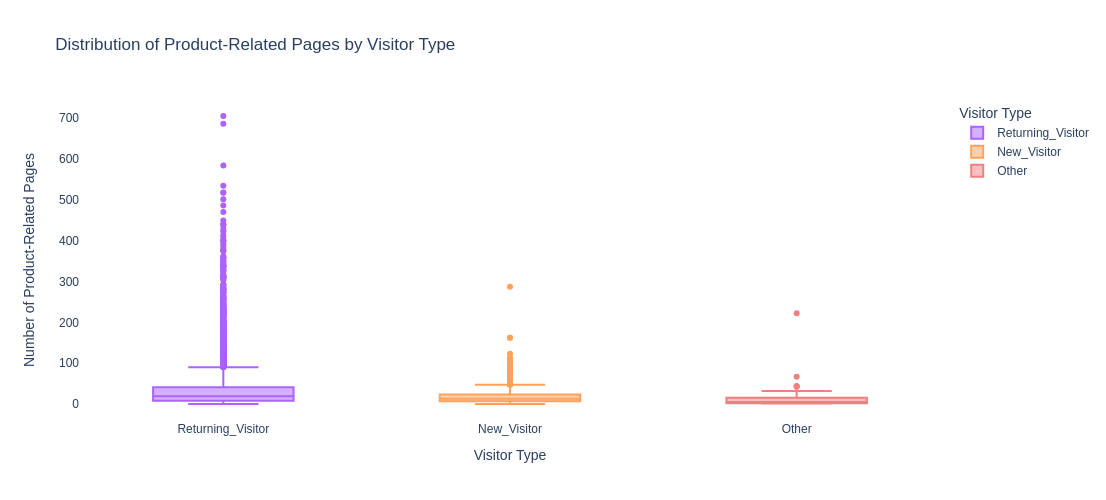

In [53]:
fig = px.box(df, x="VisitorType", y="ProductRelated",
                labels={"VisitorType": "Visitor Type", "ProductRelated": "Number of Product-Related Pages"},
                title="Distribution of Product-Related Pages by Visitor Type",
                color="VisitorType",
                color_discrete_map={"New Visitor": "skyblue", "Returning Visitor": "lightgreen", "Other": "lightcoral"})

fig.update_layout(width=700,height=500,
                 plot_bgcolor='white')
fig.show()


### 2. Quantitatives variables

### Correlation matrix

In [54]:
correlations = df.corr()

ValueError: could not convert string to float: 'Feb'

In [ ]:
fig = sp.make_subplots(rows=1, cols=1, subplot_titles=["Correlation Matrix"])

heatmap = go.Heatmap(z=correlations.values,
                    x=correlations.columns,
                    y=correlations.index,
                    colorscale="Viridis")

fig.add_trace(heatmap, row=1, col=1)

fig.update_layout(title_text="Correlation Matrix",
                  xaxis=dict(ticks=""),
                  yaxis=dict(ticks="", tickvals=list(range(len(correlations.index))), ticktext=correlations.index),
                  coloraxis_colorbar=dict(title="Correlation"))

fig.show()

Besides the type of pages and their associated durations, the only variables that seem to be correlated are the `Bounce rate` and the `Exit rate`, showing a correlation of 91%. 
So we will not use `Exit rate` as there is to much correlation between them.

### Bounce Rate by Visitor type

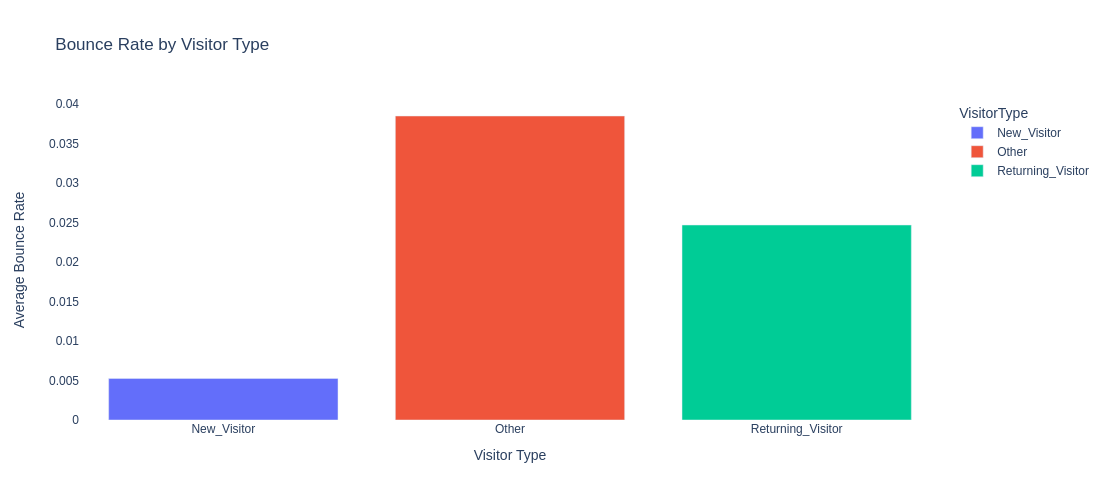

In [58]:
bounce_rate_data = df.groupby('VisitorType')['BounceRates'].mean().reset_index()
# Plot: Bounce rate by each visitor type
fig = px.bar(bounce_rate_data, x='VisitorType', y='BounceRates', color='VisitorType',
             title='Bounce Rate by Visitor Type',
             labels={'BounceRates': 'Average Bounce Rate'})

fig.update_layout(xaxis_title='Visitor Type', 
                  yaxis_title='Average Bounce Rate',
                 plot_bgcolor='white',
                 width=700,height=500)
fig.show()

The bounce rate is higher for `Other` visitors than for `returning` or `new visitors`. 

Thus, for each category of visitor, we can associate this with the many possibility. 
First,`other` visitors may be web scrapers seeking specific information, and `returning visitors` who are accustomed to the site, they might be looking for a particular product.

Meanwhile, new visitors may spend more time on pages as they are less accustomed, which is why the bounce rate is lower for this group.

## Data  Pre-processing

In [59]:
from copy import deepcopy
df_balanced = deepcopy(df)

In [60]:
# Variable 'OperatingSystems'
dummies = pd.get_dummies(df_balanced['OperatingSystems'],drop_first=True, prefix='OperatingSystems', prefix_sep='_')
df_balanced = pd.concat([df_balanced, dummies], axis=1)
del(df_balanced['OperatingSystems'])

# Variable 'Browser'
dummies = pd.get_dummies(df_balanced['Browser'],drop_first=True, prefix='browser', prefix_sep='_')
df_balanced = pd.concat([df_balanced, dummies], axis=1)
del(df_balanced['Browser'])

# Variable 'TrafficType'
dummies = pd.get_dummies(df_balanced['TrafficType'],drop_first=True, prefix='TrafficType', prefix_sep='_')
df_balanced = pd.concat([df_balanced, dummies], axis=1)
del(df_balanced['TrafficType'])

# Variable 'VisitorType'
dummies = pd.get_dummies(df_balanced['VisitorType'],drop_first=True, prefix='VisitorType', prefix_sep='_')
df_balanced = pd.concat([df_balanced, dummies], axis=1)
del(df_balanced['VisitorType'])

# Variable 'Weekend'
dummies = pd.get_dummies(df_balanced['Weekend'],drop_first=True, prefix='Weekend', prefix_sep='_')
df_balanced = pd.concat([df_balanced, dummies], axis=1)
del(df_balanced['Weekend'])


In [61]:
# Ratio value
df_balanced['rat_admin'] = df_balanced['Administrative_Duration']/df_balanced['Administrative']
df_balanced['rat_admin'] = df_balanced['rat_admin'].fillna(0)

df_balanced['rat_info'] = df_balanced['Informational_Duration']/df_balanced['Informational']
df_balanced['rat_info'] = df_balanced['rat_info'].fillna(0)

df_balanced['rat_prod'] = df_balanced['ProductRelated_Duration']/df_balanced['ProductRelated']
df_balanced['rat_prod'] = df_balanced['rat_prod'].fillna(0)

In [62]:
del(df_balanced['Administrative'])
del(df_balanced['Administrative_Duration'])
del(df_balanced['Informational'])
del(df_balanced['Informational_Duration'])
del(df_balanced['ProductRelated'])
del(df_balanced['ExitRates'])
del(df_balanced['Region'])
df_balanced.head()

ProductRelated_Duration  BounceRates  PageValues SpecialDay Month Revenue  \
0                     0.00         0.20         0.0        0.0   Feb       0   
1                    64.00         0.00         0.0        0.0   Feb       0   
2                     0.00         0.20         0.0        0.0   Feb       0   
3                     2.67         0.05         0.0        0.0   Feb       0   
4                   627.50         0.02         0.0        0.0   Feb       0   

   OperatingSystems_2  OperatingSystems_3  OperatingSystems_4  \
0               False               False               False   
1                True               False               False   
2               False               False                True   
3               False                True               False   
4               False                True               False   

   OperatingSystems_5  ...  TrafficType_6  TrafficType_7  TrafficType_8  \
0               False  ...          False          False          False   
1               False  ...          False          False          False   
2               False  ...          False          False          False   
3               False  ...          False          False          False   
4               False  ...          False          False          False   

   TrafficType_9  VisitorType_Other  VisitorType_Returning_Visitor  Weekend_1  \
0          False              False                           True      False   
1          False              False                           True      False   
2          False              False                           True      False   
3          False              False                           True      False   
4          False              False                           True       True   

   rat_admin  rat_info  rat_prod  
0        0.0       0.0     0.000  
1        0.0       0.0    32.000  
2        0.0       0.0     0.000  
3        0.0       0.0     1.335  
4        0.0       0.0    62.750  

[5 rows x 50 columns]

In [63]:
from sklearn.model_selection import train_test_split

y = df_balanced["Revenue"]
X = df_balanced.drop(["Revenue"],axis=1) # Test with and without "PageValues"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.columns

Index(['ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay',
       'Month', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'browser_10', 'browser_11',
       'browser_12', 'browser_13', 'browser_2', 'browser_3', 'browser_4',
       'browser_5', 'browser_6', 'browser_7', 'browser_8', 'browser_9',
       'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13',
       'TrafficType_14', 'TrafficType_15', 'TrafficType_16', 'TrafficType_17',
       'TrafficType_18', 'TrafficType_19', 'TrafficType_2', 'TrafficType_20',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6',
       'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_1', 'rat_admin', 'rat_info',
       'rat_prod'],
      dtype='object')

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, RobustScaler
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

def convert_bool_to_int(df):
    for column in df.select_dtypes(include=['bool']).columns:
        df[column] = df[column].astype(int)
    return df

bool_to_int_transformer = FunctionTransformer(convert_bool_to_int)

# Custom transformer for month conversion
def convert_month(df):
    df['Month'] = df['Month'].map(month_to_num)
    return df

month_converter = FunctionTransformer(convert_month)

# Defining the ColumnTransformer for different transformations
preprocessor = ColumnTransformer(
    transformers=[
        #('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['VisitorType']),
        ('bool', bool_to_int_transformer, list(X.select_dtypes(include=['bool']).columns)),
        ('month', month_converter, ['Month']),
        ('scaler', RobustScaler(), ["rat_admin", "rat_info", "rat_prod","PageValues"])
    ],
    remainder='passthrough'  # Keep other columns untouched
)


In [65]:
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=2)),
])
pipeline_knn.fit(X_train,y_train)
y_pred = pipeline_knn.predict(X_test)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision and Recall
print("Precision:", precision_score(y_test, y_pred,average="macro")) 
print("Recall:", recall_score(y_test, y_pred,average="macro"))       

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred,average="macro"))         

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8503649635036497
Precision: 0.7404564795116085
Recall: 0.6231143552311436
F1 Score: 0.6504117857907106
Confusion Matrix:
 [[1981   74]
 [ 295  116]]


#

## Test with Kmeans and display data with PCA

/home/onogone/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/onogone/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/onogone/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/onogone/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/onogone/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_km

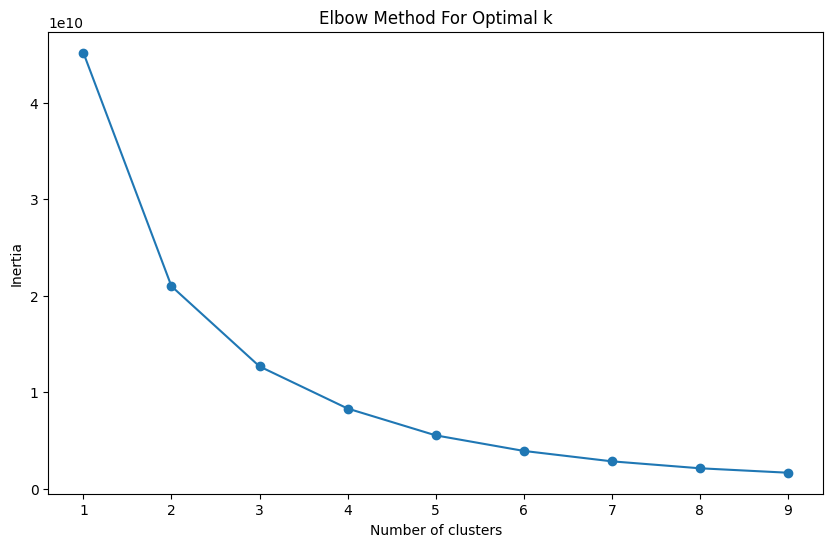

In [67]:
inertia = []
K_range = range(1, 10)  # Adjust the range as needed
from sklearn.cluster import KMeans
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans()),
])
for k in K_range:
    # Update the number of clusters in KMeans
    pipeline.set_params(kmeans__n_clusters=k)
    
    # Fit the pipeline to the data
    pipeline.fit(df_balanced)
    
    # Record the inertia
    inertia.append(pipeline.named_steps['kmeans'].inertia_)
    

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [68]:
import copy
k=3
pipeline.set_params(kmeans__n_clusters=k)
pipeline.fit(df_balanced)

cluster_labels = pipeline.predict(df_balanced)

# Add the cluster labels to your DataFrame
final_df = copy.deepcopy(df_balanced)
final_df['Cluster'] = cluster_labels
final_df.head()

/home/onogone/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



ProductRelated_Duration  BounceRates  PageValues SpecialDay Month Revenue  \
0                     0.00         0.20         0.0        0.0   Feb       0   
1                    64.00         0.00         0.0        0.0   Feb       0   
2                     0.00         0.20         0.0        0.0   Feb       0   
3                     2.67         0.05         0.0        0.0   Feb       0   
4                   627.50         0.02         0.0        0.0   Feb       0   

   OperatingSystems_2  OperatingSystems_3  OperatingSystems_4  \
0               False               False               False   
1                True               False               False   
2               False               False                True   
3               False                True               False   
4               False                True               False   

   OperatingSystems_5  ...  TrafficType_7  TrafficType_8  TrafficType_9  \
0               False  ...          False          False          False   
1               False  ...          False          False          False   
2               False  ...          False          False          False   
3               False  ...          False          False          False   
4               False  ...          False          False          False   

   VisitorType_Other  VisitorType_Returning_Visitor  Weekend_1  rat_admin  \
0              False                           True      False        0.0   
1              False                           True      False        0.0   
2              False                           True      False        0.0   
3              False                           True      False        0.0   
4              False                           True       True        0.0   

   rat_info  rat_prod  Cluster  
0       0.0     0.000        0  
1       0.0    32.000        0  
2       0.0     0.000        0  
3       0.0     1.335        0  
4       0.0    62.750        0  

[5 rows x 51 columns]

In [69]:
final_df['Cluster'].value_counts()

Cluster
0    10153
1     1972
2      205
Name: count, dtype: int64

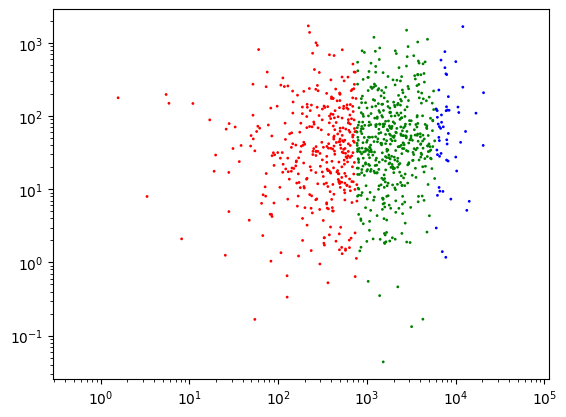

percentage explained by 2 axis: 99.99009994748565


In [70]:
from sklearn.decomposition import PCA
pipeline_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)),
])
pca_transformed_data = pipeline_pca.fit_transform(final_df)
plt.yscale("log")
plt.xscale("log")
LABEL_COLOR_MAP = {0:"r",1:"g",2:"b"}
label_color = [LABEL_COLOR_MAP[cluster] for cluster in final_df['Cluster']]
plt.scatter(pca_transformed_data[:,0],pca_transformed_data[:,1],s=1,color=label_color)
plt.show()

print(f"percentage explained by 2 axis: {sum(pipeline_pca.named_steps['pca'].explained_variance_ratio_)*100}")

# PageValues prediction

In [71]:
y = df_balanced["PageValues"]
X = df_balanced.drop(["PageValues"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.columns

Index(['ProductRelated_Duration', 'BounceRates', 'SpecialDay', 'Month',
       'Revenue', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'browser_10', 'browser_11',
       'browser_12', 'browser_13', 'browser_2', 'browser_3', 'browser_4',
       'browser_5', 'browser_6', 'browser_7', 'browser_8', 'browser_9',
       'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13',
       'TrafficType_14', 'TrafficType_15', 'TrafficType_16', 'TrafficType_17',
       'TrafficType_18', 'TrafficType_19', 'TrafficType_2', 'TrafficType_20',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6',
       'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_1', 'rat_admin', 'rat_info',
       'rat_prod'],
      dtype='object')

In [74]:

def convert_bool_to_int(df):
    for column in df.select_dtypes(include=['bool']).columns:
        df[column] = df[column].astype(int)
    return df

bool_to_int_transformer = FunctionTransformer(convert_bool_to_int)

# Custom transformer for month conversion
def convert_month(df):
    df['Month'] = df['Month'].map(month_to_num)
    return df

month_converter = FunctionTransformer(convert_month)

# Defining the ColumnTransformer for different transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('bool', bool_to_int_transformer, list(X.select_dtypes(include=['bool']).columns)),
        ('month', month_converter, ['Month']),
        ('scaler', RobustScaler(), ["rat_admin", "rat_info", "rat_prod"])
    ],
    remainder='passthrough'  # Keep other columns untouched
)


In [75]:
pipeline_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regression', SVR()),
])
pipeline_reg.fit(X_train,y_train)
y_pred = pipeline_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("The mean square error is :")
print(mse)

The mean square error is :
392.9984044215123


In [76]:
from sklearn.model_selection import GridSearchCV
import math
param_grid = {
    'regression__C': [0.1,10],
    'regression__gamma': [0.001,10],
    'regression__kernel': ['rbf'],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score (negative MSE)
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

# Predict and evaluate using the best estimator
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}, mean error: {math.sqrt(mse)}")

Best parameters: {'regression__C': 10, 'regression__gamma': 10, 'regression__kernel': 'rbf'}
Best score (negative MSE): -354.1990702377505
Test MSE: 371.8619932594777, mean error: 19.283723532022485


# Bonus

In [77]:
!pip install shapash
!pip install shapash[scikit-learn]

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [78]:
from shapash import SmartExplainer
from sklearn.ensemble import RandomForestRegressor
pipeline_rfr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor()),
])
pipeline_rfr.fit(X_train,y_train)
transform=pipeline_rfr.named_steps["preprocessor"]
xtest = pd.DataFrame(transform.transform(X_test),columns=X_test.columns)
model=pipeline_rfr.named_steps["regressor"]
xpl = SmartExplainer(model=model)
xpl.compile(
    x=xtest,    
)
app = xpl.run_app()


     ProductRelated_Duration BounceRates SpecialDay Month Revenue  \
0                          0           0          0     0       0   
1                          1           0          0     0       0   
2                          1           0          0     0       0   
3                          1           0          0     0       0   
4                          1           0          0     0       0   
...                      ...         ...        ...   ...     ...   
2461                       0           1          0     0       0   
2462                       1           0          0     0       0   
2463                       1           0          0     0       0   
2464                       0           0          0     0       0   
2465                       1           0          0     0       0   

     OperatingSystems_2 OperatingSystems_3 OperatingSystems_4  \
0                     0                  0                  0   
1                     0                  

X has feature names, but RandomForestRegressor was fitted without feature names
DataFrame.applymap has been deprecated. Use DataFrame.map instead.
Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
INFO:root:Your Shapash application run on http://onogone-20210702:8050/
INFO:root:Use the method .kill() to down your app.
Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/onogone/miniconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/home/onogone/miniconda3/lib/python3.9/site-packages/shapash/utils/threading.py", line 29, in __run
    self.__run_backup()
  File "/home/onogone/miniconda3/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/home/onogone/miniconda3/lib/python3.9/site-packages/shapash/explainer/smart_explainer.py", line 1079, in <lambda>
    target=lambda: self.smartapp.app.run_server(debug=False, host=host, port=port))
  File 